# Emotion detection by Group 2 CSC 4444

In [1]:
# import libraries
import math
import numpy as np
import pandas as pd
import os

import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

2022-12-06 15:30:12.247578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 15:30:12.519181: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-06 15:30:13.304806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-06 15:30:13.304861: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

## read data (obtained from kaggle)

In [2]:
data = pd.read_csv('./data/fer2013.csv') # load data
print(data.shape) # print data shape
data.head() # show the data head

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# show the emotions available
print(data.emotion.unique())
# assign emotions
emotion_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
print(emotion_text)

[0 2 4 6 3 5 1]
{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgust'),
 Text(2, 0, 'Fear'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Sad'),
 Text(5, 0, 'Surprise'),
 Text(6, 0, 'Neutral')]

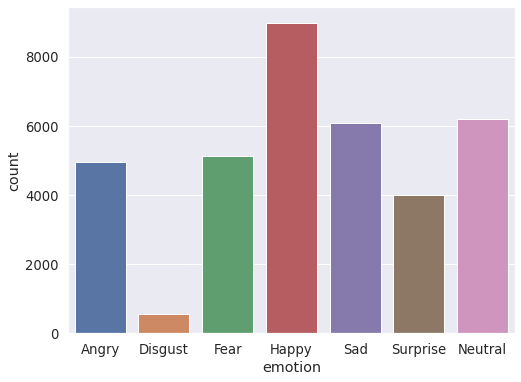

In [59]:
import seaborn as sns

plt.rcParams.update({'font.size': 100})
plt.figure(figsize=(8,6))

# Train
gt = sns.countplot(data = data, x = 'emotion')
gt.set_xticklabels(list(emotion_text.values())) 


In [60]:
# sample the available emotion counts
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

# prepare data for AI creation

In [8]:
img_array = data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [9]:
img_array.shape #print array shape

(35887, 48, 48, 1)

In [10]:
# convert text to arrays
enconder = LabelEncoder()
img_labels = enconder.fit_transform(data.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [11]:
# map arrays to classes
enconder_name_mapping = dict(zip(enconder.classes_, enconder.transform(enconder.classes_)))
print(enconder_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


### Split data into training and validation set

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298, 7), (3589, 7))

In [13]:
# set width, height, depth and classes count of the images
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [14]:
# data normalization
X_train = X_train / 255.
X_valid = X_valid / 255.

# AI model development

### create an instance

In [15]:
def model(optim):
    """
    
    """
    class4444 = Sequential(name='DCNN')

    class4444.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_1'))
    class4444.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_2'))
    
    class4444.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    class4444.add(Dropout(0.4, name='dropout_1'))

    class4444.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_3'))
    class4444.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_4'))
    
    class4444.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    class4444.add(Dropout(0.4, name='dropout_2'))

    class4444.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_5'))
    class4444.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_6'))
    
    class4444.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    class4444.add(Dropout(0.5, name='dropout_3'))

    class4444.add(Flatten(name='flatten'))
        
    class4444.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    class4444.add(BatchNormalization(name='batchnorm_7'))
    
    class4444.add(Dropout(0.6, name='dropout_4'))
    
    class4444.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    class4444.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    class4444.summary()
    
    return class4444

### Train model

In [16]:
# train parameters

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [17]:
# convert numeric arrays to image generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [18]:
# Train model

batch_size = 32 
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]


model = model(optims[1]) 
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

2022-12-06 15:31:01.687085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-06 15:31:01.687111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (che-rm2125-lin01): /proc/driver/nvidia/version does not exist
2022-12-06 15:31:01.688436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

### save model 

In [20]:
model.save("Emotion_detect")

INFO:tensorflow:Assets written to: Emotion_detect/assets


INFO:tensorflow:Assets written to: Emotion_detect/assets


In [21]:
model.save("model.h5")

In [62]:
!pwd

/home/romagnolilab/Downloads/CSC4444/Dec6th_R2


# Model evaluation

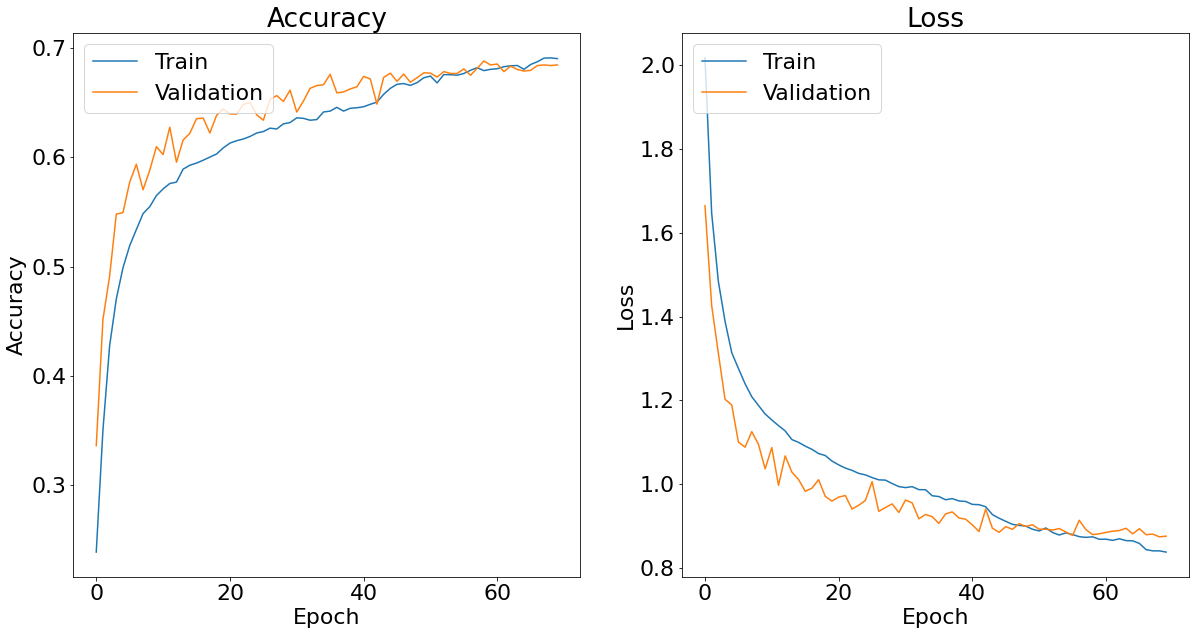

In [22]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

fig , ax = plt.subplots(1,2, figsize = (20, 10))
train_acc = history.history['accuracy']
train_loss = history.history['loss']


ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [24]:
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [25]:
emotion_text = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [35]:
model.evaluate(X_valid)
preds = model.predict(X_valid)
y_preds = np.argmax(preds , axis = 1 )
y_act = np.argmax(y_valid , axis = 1 )

113/113 [==============================] - 8s 68ms/step


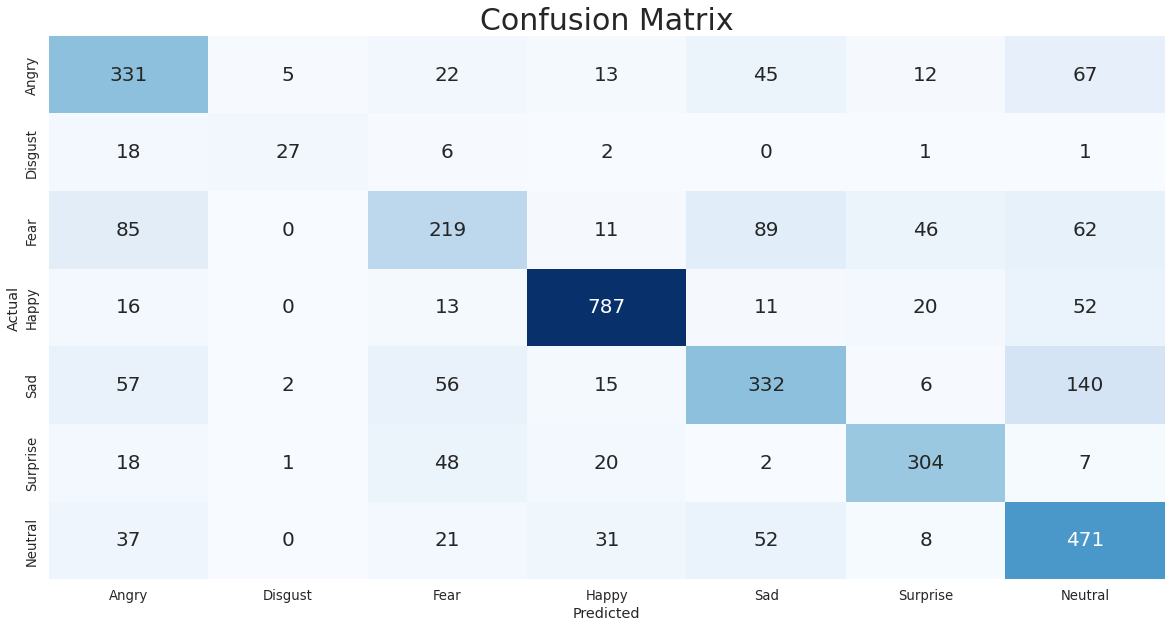

In [42]:
plt.rcParams.update({'font.size': 30})

class_labels = list(emotion_text.values())
cm_data = confusion_matrix(y_act, y_preds)
cm = pd.DataFrame(cm_data, columns = class_labels, index = class_labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 30)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 20}, fmt='g')

In [43]:
print(classification_report(y_act, y_preds))


              precision    recall  f1-score   support

           0       0.59      0.67      0.63       495
           1       0.77      0.49      0.60        55
           2       0.57      0.43      0.49       512
           3       0.90      0.88      0.89       899
           4       0.63      0.55      0.58       608
           5       0.77      0.76      0.76       400
           6       0.59      0.76      0.66       620

    accuracy                           0.69      3589
   macro avg       0.69      0.65      0.66      3589
weighted avg       0.69      0.69      0.69      3589



ROC AUC score: 0.9384880294403379


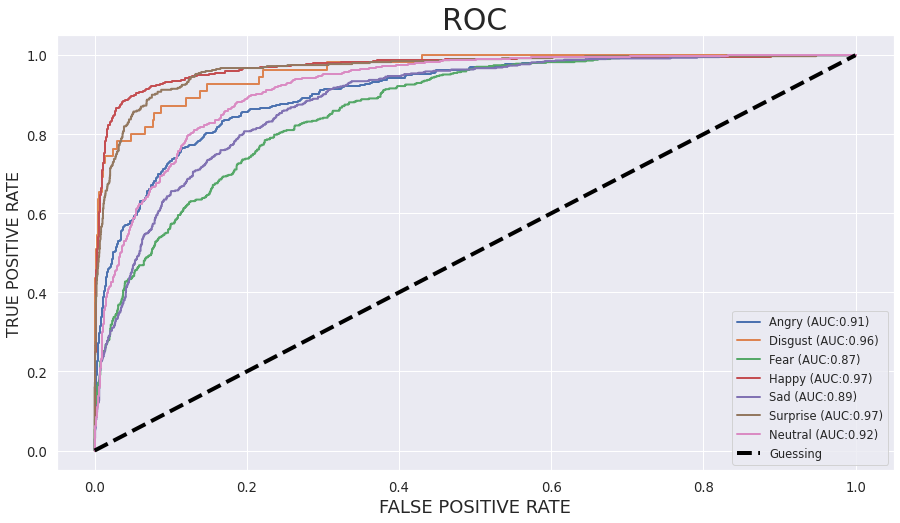

In [47]:
# Multiclass AUC Curve
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_labels):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle = 'dashed', lw=4, label = 'Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_act, preds, average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.title('ROC', fontsize = 30)
plt.legend(fontsize = 11.5)
plt.show()
